In [55]:
#import
import pandas as pd
import matplotlib.pyplot as plt

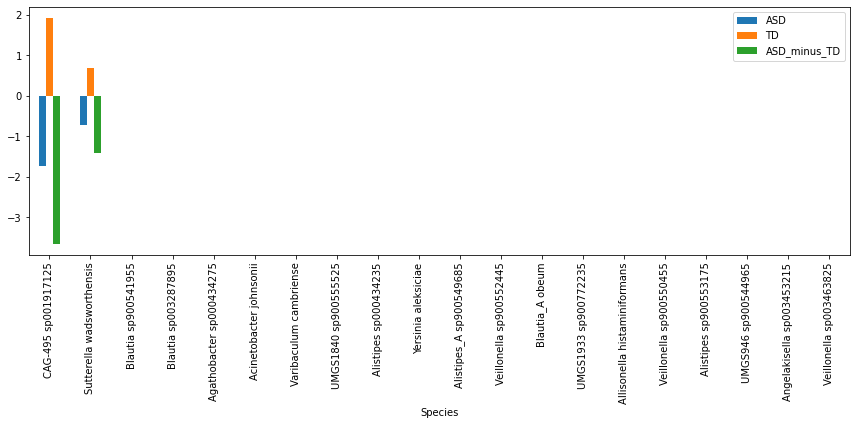

In [119]:
#Wang2020ASD
probs = pd.read_csv('../Wang2020ASD/shap2/class_probabilities.tsv', sep = '\t', index_col = False)
#remove columns with all 0 values
probs_new = probs.loc[:, (probs != 0).any(axis=0)]
Metadata = pd.read_csv('../Wang2020ASD/sample_metadata_wang.txt', sep = '\t')
#select ids and status
Metadata_new = Metadata[['sampleid', 'Group']]
#Merge two df based on sampleid
Wang_probs = Metadata_new.merge(probs_new, left_on="sampleid", right_on = 'Unnamed: 0')
Wang_probs = Wang_probs.drop(['sampleid', 'Unnamed: 0'], axis=1)
Wang_probs_mean = Wang_probs.groupby('Group',as_index=False).mean()
Wang_probs_mean_transposed = Wang_probs_mean.T
#add colnames for dataframe
Wang_probs_mean_transposed = Wang_probs_mean_transposed.reset_index()
Wang_probs_mean_transposed.columns = ['Species','ASD', 'TD']
#remove first row
Wang_probs_mean_transposed = Wang_probs_mean_transposed.iloc[1: , :]
# #add one column
Wang_probs_mean_transposed['ASD_minus_TD'] = Wang_probs_mean_transposed['ASD']- Wang_probs_mean_transposed['TD']
#plot
Wang_probs_mean_transposed.sort_values(by=['ASD_minus_TD'],ascending=True).head(20).plot(x='Species', y=["ASD","TD","ASD_minus_TD"], kind="bar",align='center')
plt.tight_layout(rect=[0, 0, 2, 1])
plt.subplots_adjust(bottom=0.1)

#iMSMS2021MS
probs = pd.read_csv('../iMSMS2021MS/shap2/class_probabilities.tsv', sep = '\t', index_col = False)
#remove columns with all 0 values
probs_new = probs.loc[:, (probs != 0).any(axis=0)]
Metadata = pd.read_csv('../iMSMS2021MS/iMSMS2021MS_metadata_matched.txt', sep = '\t')
#select ids and status
Metadata_new = Metadata[['featureid', 'disease_state']]
#Merge two df based on sampleid
iMSMS_probs = Metadata_new.merge(probs_new, left_on="featureid", right_on = 'Unnamed: 0')
iMSMS_probs = iMSMS_probs.drop(['featureid', 'Unnamed: 0'], axis=1)
iMSMS_probs_mean = iMSMS_probs.groupby('disease_state',as_index=False).mean()
iMSMS_probs_mean_transposed = iMSMS_probs_mean.T
#add colnames for dataframe
iMSMS_probs_mean_transposed = iMSMS_probs_mean_transposed.reset_index()
iMSMS_probs_mean_transposed.columns = ['Species','Control', 'MS']
#remove first row
iMSMS_probs_mean_transposed = iMSMS_probs_mean_transposed.iloc[1: , :]
#add one column
iMSMS_probs_mean_transposed['MS_minus_control'] = iMSMS_probs_mean_transposed['MS']- iMSMS_probs_mean_transposed['Control']
#plot
iMSMS_probs_mean_transposed.sort_values(by=['MS_minus_control'],ascending=True).plot(x='Species', y=["Control","MS","MS_minus_control"], kind="bar",align='center')
plt.tight_layout(rect=[0, 0, 2, 1])
plt.subplots_adjust(bottom=0.1)

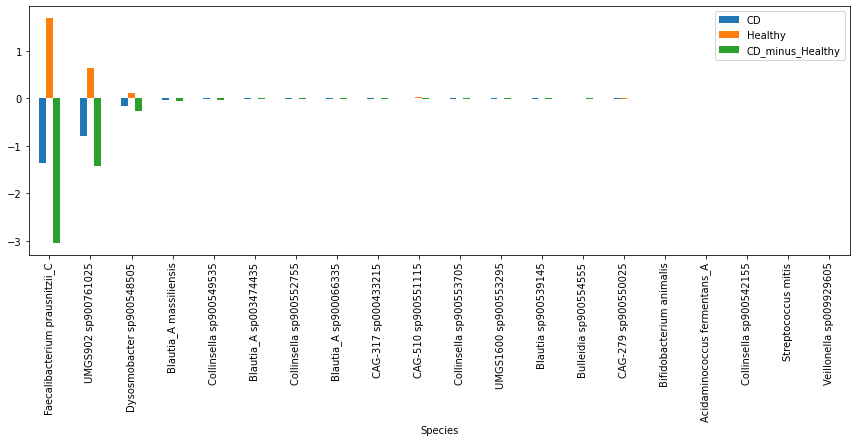

In [117]:
#Freanzosa2019IBD_CD
probs = pd.read_csv('../Franzosa2019IBD/shap/shap/data/class_probabilities.tsv', sep = '\t', index_col = False)
#remove columns with all 0 values
probs_new = probs.loc[:, (probs != 0).any(axis=0)]
Metadata = pd.read_csv('../Franzosa2019IBD/Metadata_CD_matched.txt', sep = '\t')
#select ids and status
Metadata_new = Metadata[['featureid', 'Status']]
#Merge two df based on sampleid
Franzosa_CD_probs = Metadata_new.merge(probs_new, left_on="featureid", right_on = 'Unnamed: 0')
Franzosa_CD_probs = Franzosa_CD_probs.drop(['featureid', 'Unnamed: 0'], axis=1)
Franzosa_CD_probs_mean = Franzosa_CD_probs.groupby('Status',as_index=False).mean()
Franzosa_CD_probs_mean_transposed = Franzosa_CD_probs_mean.T
#add colnames for dataframe
Franzosa_CD_probs_mean_transposed = Franzosa_CD_probs_mean_transposed.reset_index()
Franzosa_CD_probs_mean_transposed.columns = ['Species','CD', 'Healthy']
#remove first row
Franzosa_CD_probs_mean_transposed = Franzosa_CD_probs_mean_transposed.iloc[1: , :]
#add one column
Franzosa_CD_probs_mean_transposed['CD_minus_Healthy'] = Franzosa_CD_probs_mean_transposed['CD']- Franzosa_CD_probs_mean_transposed['Healthy']
#plot
Franzosa_CD_probs_mean_transposed.sort_values(by=['CD_minus_Healthy'],ascending=True).head(20).plot(x='Species', y=["CD","Healthy","CD_minus_Healthy"], kind="bar",align='center')
plt.tight_layout(rect=[0, 0, 2, 1])
plt.subplots_adjust(bottom=0.1)